<a href="https://www.kaggle.com/code/dianaddx/churn-let-s-go-eda-lgbm?scriptVersionId=160167329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="color: #365486; font-size: 110%;"><b>🎯NB Goal</b>: develop models capable of predicting potential churners and provide insights that can aid in the development of effective customer retention strategies.</p>

<br>

---
<br>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

1. [Customer Churn in Banking](#1)
    
2. [Dataset](#2)
   
3. [Libraries](#3)
    
4. [Data Loading](#4)
    
5. [Descriptive Statistics](#5) 
    
6. [EDA](#6)
    
7. [Feature Engineering](#7)  
    
8. [Data Preprocessing](#8) 
    
9. [Light GBM Model](#9) 
    
10. [Submission](#10) 
     
<br>  
    
---


<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Customer Churn in Banking</p>

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">

<p style="color: #365486;">Customer churn, also known as <b>customer attrition</b>, is a critical metric for businesses, including the banking industry. It refers to the phenomenon where customers cease their relationship with a company, indicating a departure from using its products or services. In the context of banking, churn occurs <u>when customers close their accounts or discontinue utilizing various financial services provided by the bank.</u></p>
    
<p style="color: #365486;">Predicting and understanding customer churn is of paramount importance for financial institutions. It enables banks to proactively identify potential churners, allowing them to implement targeted strategies for customer retention. The ability to forecast churn empowers banks to take preventive measures, such as offering personalized incentives, improving customer service, or introducing new features to retain valued clients.</p>

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Dataset</p>

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">

<p style="color: #365486; font-size: 100%;">The <b>🏦 Bank Customer Churn Dataset 💸 </b> is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be customers. The dataset includes the following attributes:</p>

<ul style="color: #365486;">
    <li><b>Customer ID</b>: A unique identifier for each customer.</li>
    <br>
    <li><b>Surname</b>: The customer's surname or last name.</li>
    <br>
    <li><b>Credit Score</b>: A numerical value representing the customer's credit score.</li>
    <br>
    <li><b>Geography</b>: The country where the customer resides (France, Spain or Germany).</li>
    <br>
    <li><b>Gender</b>: The customer's gender (Male or Female).</li>
    <br>
    <li><b>Age</b>: The customer's age.</li>
    <br>
    <li><b>Tenure</b>: The number of years the customer has been with the bank.</li>
    <br>
    <li><b>Balance</b>: The customer's account balance.</li>
    <br>
    <li><b>NumOfProducts</b>: The number of bank products the customer uses (e.g.: savings account, credit card).</li>
    <br>
    <li><b>HasCrCard</b>: Whether the customer has a credit card (1 = yes, 0 = no).</li>
    <br>
    <li><b>IsActiveMember</b>: Whether the customer is an active member (1 = yes, 0 = no).</li>
    <br>
    <li><b>EstimatedSalary</b>: The estimated salary of the customer.</li>
    <br>
    <li><b>Exited</b>: Whether the customer has churned (1 = yes, 0 = no).</li>
</ul>
    
<br>
    
<p style="color: #365486;"><b><u>Dataset Division</u></b></p>

<ol style="color: #365486;">
    <li><b>train.csv:</b> the training dataset; Exited is the binary target</li>
    <br>
    <li><b>test.csv:</b> the test dataset; your objective is to predict the probability of Exited</li>
    <br>
    <li><b>sample_submission.csv:</b> a sample submission file in the correct format</li>
</ol>
 
<br>
    
<p style="color: #365486;"><i>More information about the dataset can be found <a href="https://www.kaggle.com/competitions/playground-series-s4e1/data"><u>here</u></a>.</i></p>
   


<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Libraries</p>

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Data Loading</p>

In [2]:
# Load datasets
train_df = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sample_submission_df = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

# Shape of datasets
print(f"The Train dataset consists of {train_df.shape[0]} rows and {train_df.shape[1]} columns.") 
print(f"The Test dataset consists of {test_df.shape[0]} rows and {test_df.shape[1]} columns.") 
print(f"The sample submission dataset consists of {sample_submission_df.shape[0]} rows and {sample_submission_df.shape[1]} columns.") 

The Train dataset consists of 165034 rows and 14 columns.
The Test dataset consists of 110023 rows and 13 columns.
The sample submission dataset consists of 110023 rows and 2 columns.


In [3]:
train_df.head()
# train_df.info()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test_df.head()
# test_df.info()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
sample_submission_df.head()
# sample_submission_df.info()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Descriptive Statistics</p>

In [6]:
def check(df):
    """
    Generates a concise summary of DataFrame columns, including 
    data type, non-null instances, unique values, null values and duplicates. 
    """ 
    summary = []
    
    for col in df.columns:
        instances = df[col].count()
        dtypes = df[col].dtype
        unique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        duplicates = df.duplicated().sum()
        summary.append([col, dtypes, instances, unique, sum_null, duplicates])
        
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return df_check

In [7]:
check(train_df)

,column,dtype,instances,unique,sum_null,duplicates
0,id,int64,165034,165034,0,0
1,CustomerId,int64,165034,23221,0,0
2,Surname,object,165034,2797,0,0
3,CreditScore,int64,165034,457,0,0
4,Geography,object,165034,3,0,0
5,Gender,object,165034,2,0,0
6,Age,float64,165034,71,0,0
7,Tenure,int64,165034,11,0,0
8,Balance,float64,165034,30075,0,0
9,NumOfProducts,int64,165034,4,0,0


In [8]:
train_df.describe().round(2)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.0,165034.00,165034.00
mean,82516.50,15692005.02,656.45,38.13,5.02,55478.09,1.55,0.75,0.5,112574.82,0.21
std,47641.36,71397.82,80.10,8.87,2.81,62817.66,0.55,0.43,0.5,50292.87,0.41
min,0.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.0,11.58,0.00
25%,41258.25,15633141.00,597.00,32.00,3.00,0.00,1.00,1.00,0.0,74637.57,0.00
50%,82516.50,15690169.00,659.00,37.00,5.00,0.00,2.00,1.00,0.0,117948.00,0.00
75%,123774.75,15756824.00,710.00,42.00,7.00,119939.52,2.00,1.00,1.0,155152.47,0.00
max,165033.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.0,199992.48,1.00


In [9]:
check(test_df)

,column,dtype,instances,unique,sum_null,duplicates
0,id,int64,110023,110023,0,0
1,CustomerId,int64,110023,19698,0,0
2,Surname,object,110023,2708,0,0
3,CreditScore,int64,110023,454,0,0
4,Geography,object,110023,3,0,0
5,Gender,object,110023,2,0,0
6,Age,float64,110023,74,0,0
7,Tenure,int64,110023,11,0,0
8,Balance,float64,110023,22513,0,0
9,NumOfProducts,int64,110023,4,0,0


In [10]:
test_df.describe().round(2)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.00,110023.00,110023.00,110023.00,110023.00,110023.00,110023.00,110023.00,110023.0,110023.00
mean,220045.00,15692096.61,656.53,38.12,5.00,55333.61,1.55,0.75,0.5,112315.15
std,31761.05,71684.99,80.32,8.86,2.81,62788.52,0.54,0.43,0.5,50277.05
min,165034.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.0,11.58
25%,192539.50,15632859.00,597.00,32.00,3.00,0.00,1.00,1.00,0.0,74440.33
50%,220045.00,15690175.00,660.00,37.00,5.00,0.00,2.00,1.00,0.0,117832.23
75%,247550.50,15756926.00,710.00,42.00,7.00,120145.60,2.00,1.00,1.0,154631.35
max,275056.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.0,199992.48


In [11]:
# Dropping not useful columns
train_df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)
test_df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

def data_converter(df):
    df['Age']= df['Age'].astype('int')
    df['HasCrCard']= df['HasCrCard'].astype('int')
    df['IsActiveMember']= df['IsActiveMember'].astype('int')
    
    return df

train_df = data_converter(train_df)
test_df = data_converter(test_df)

<a id="6"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">EDA</p>

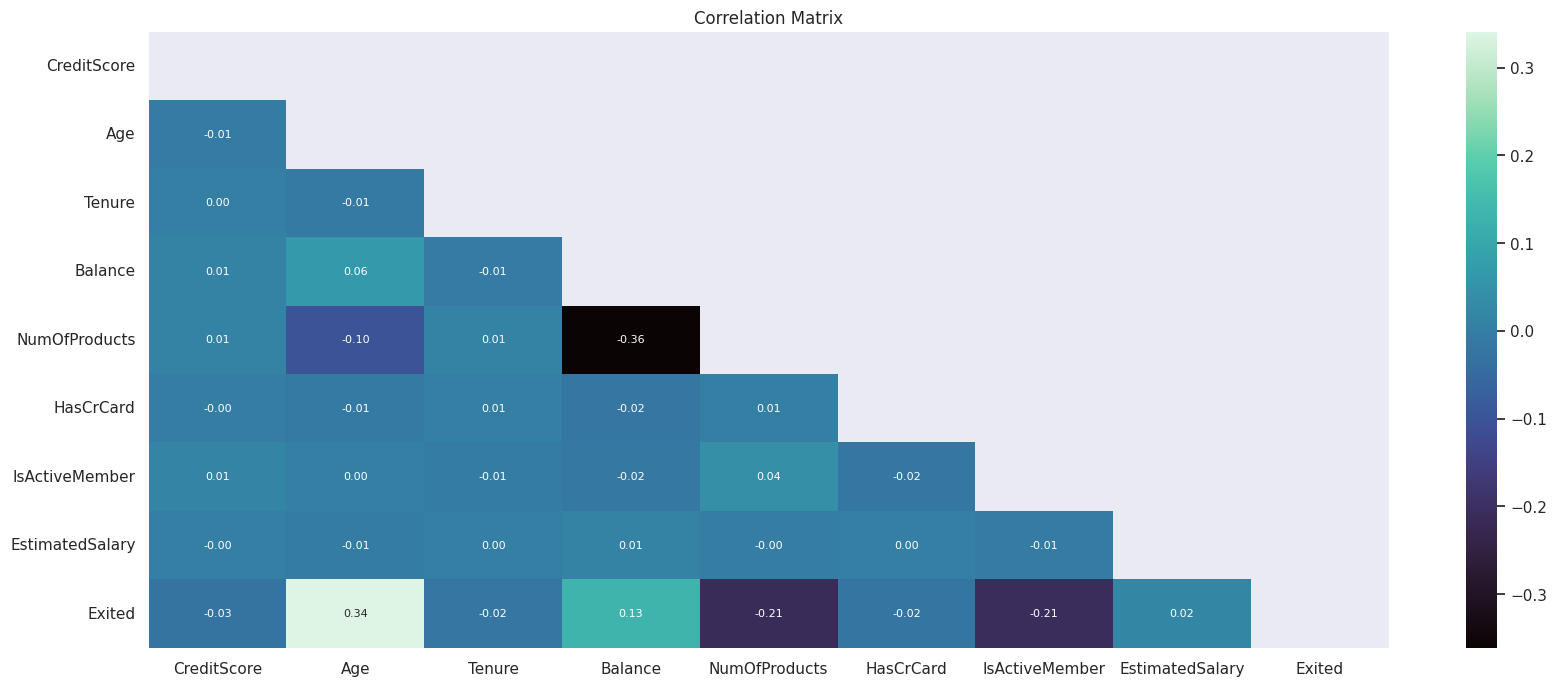

In [12]:
sns.set(style="dark")

# Create numerical dataframe
num_col = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Exited']
df_num = train_df[num_col]


# Correlation matrix 
def plot_correlation_matrix(df):

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask,cmap='mako', annot=True,fmt=".2f", annot_kws={"size": 8})
    plt.title('Correlation Matrix')
    plt.show()


plot_correlation_matrix(df_num)

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 Correlation Matrix Insights</font></h3>

<ul style="color: #365486;">
    <li>Age has a moderate positive correlation with Exited (0.3408), suggesting that <b>older individuals are more likely to exit</b>.</li>
    <br>
    <li>IsActiveMember has a weak negative correlation with Exited(-0.21), indicating that <b>inactive members are more likely to exit</b>.</li>
    <br>
    <li>NumOfProducts has a moderate negative correlation with Exited(-0.21), indicating that <b>customers with more products are less likely to exit</b>.</li>
    <br>
    <li>CreditScore has a very weak negative correlation with Age (-0.0089), indicating that there is a slight <b>tendency for older individuals to have slightly lower credit scores</b>.</li>
    <br>
    <li>Balance has a moderate negative correlation with NumOfProducts (-0.3610), indicating that <b>individuals with more products tend to have lower balances</b>.</li>
    <br>
    <li>Balance has a moderate positive correlation with Exited(0.13), suggesting that <b>customers with higher balances are more likely to exit</b>.</li>
    
  </ul>


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Geography</p>

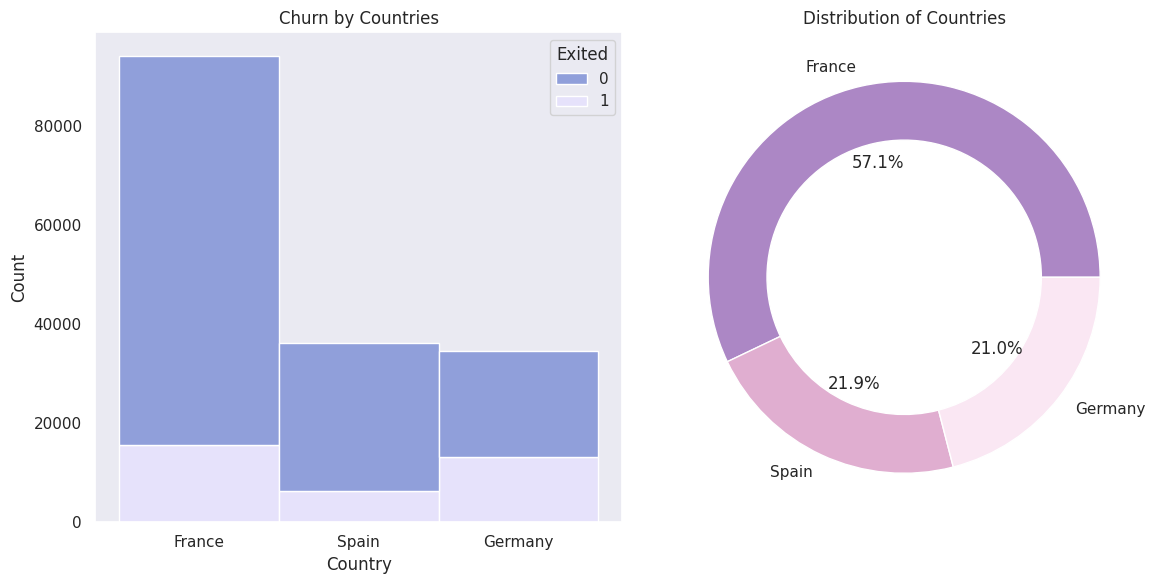

In [13]:
            ### Geography ###
      
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram  for Geography 
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='Geography', hue='Exited', binwidth=1, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')
axes[0].set_title('Churn by Countries')

# Pie chart for Geography
palette2 =["#AC87C5", "#E0AED0", "#FAE7F3"]
geography_counts = train_df['Geography'].value_counts()
axes[1].pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', colors=palette2, wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set_title('Distribution of Countries')


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Geography</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>With a total count of <b>165,034 entries</b>, we have <u>three unique categories</u>: <b>France</b>, <b>Spain</b> and <b>Germany</b>.</li>
    <br>
    <li>Approximately <b>57% (94,215 entries</b>) of the dataset consists of customers from France, making it the dominant geographical category.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Gender</p>

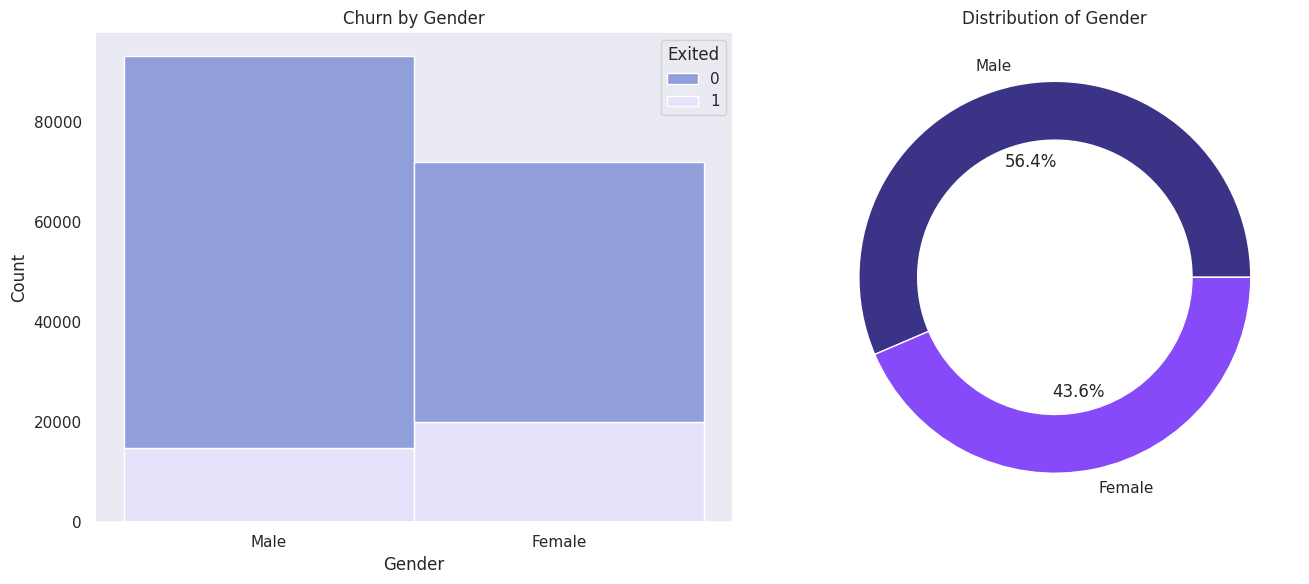

In [14]:
            ### Gender ###

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for Gender
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='Gender', hue='Exited', binwidth=1, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_title('Churn by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Pie chart for Gender
palette2 = ["#3B3486","#864AF9"]
gender_counts = train_df['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette2, wedgeprops=dict(width=0.3, edgecolor='w'))
axes[1].set_title('Distribution of Gender')


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Gender</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>Gender distribution is <b>skewed towards males</b> in our dataset</b>.</li>
    <br>
    <li><b>Male</b> appears <b>93,150 </b>times out of the total <b>165,034 </b>entries.</li>
    <br>
    <li><b>Female</b> appears <b>71,884</b> times out of the total.</li>
</ul>


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Age</p>

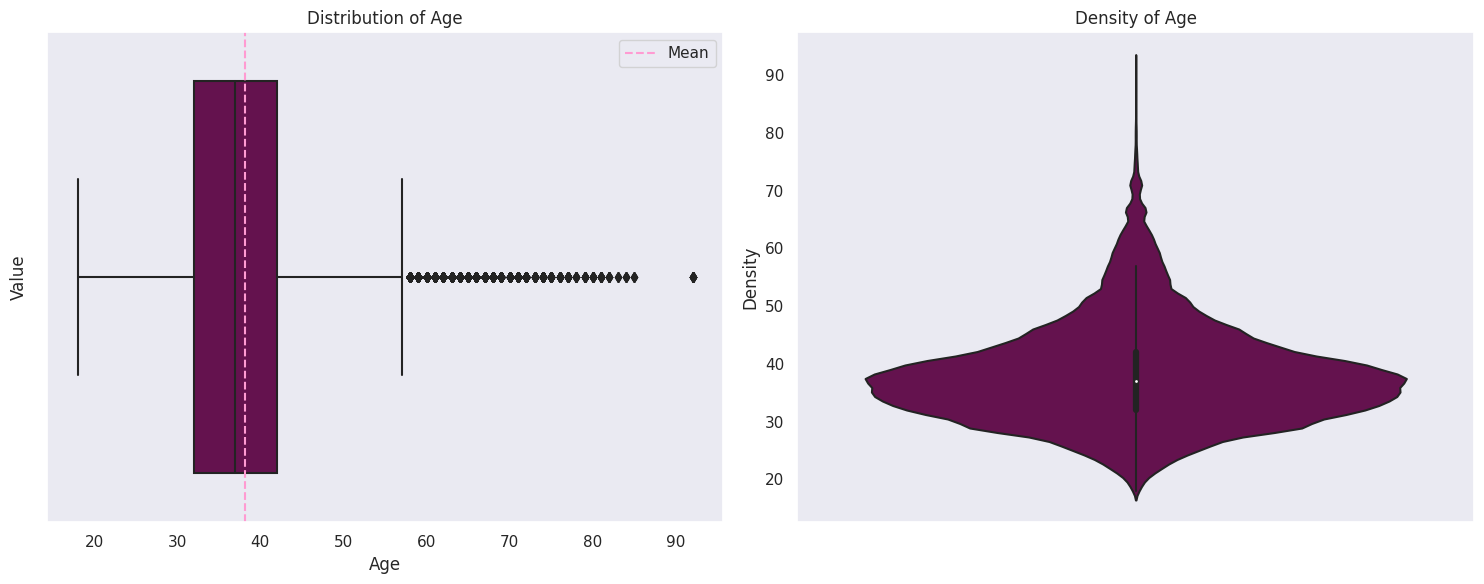

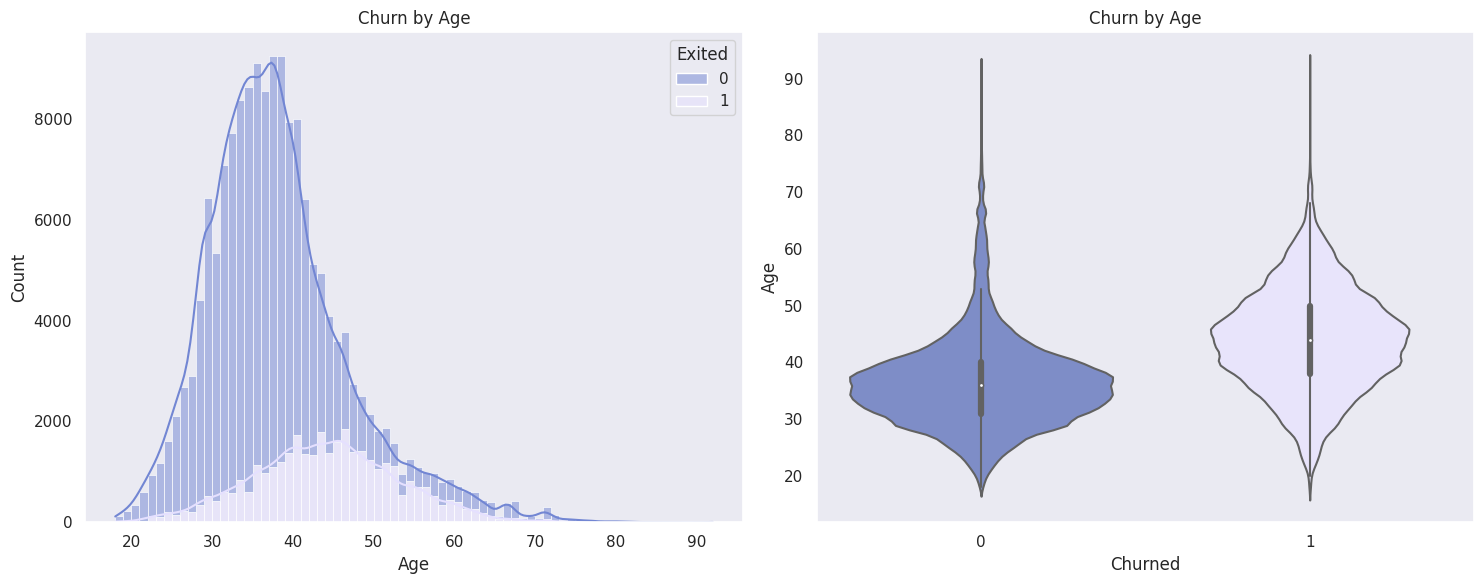

In [15]:
            ### Age ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for Age
palette = ["#720455"]
sns.boxplot(data=train_df,x="Age", palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Value')

mean_line = train_df['Age'].mean()
axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
axes[0].legend()

# Violin Plot for Age ###
sns.violinplot(data=train_df, y='Age', palette=palette, ax=axes[1])
axes[1].set_title('Density of Age')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Age
my_palette = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='Age', hue='Exited', bins=10, kde=True, binwidth=1, multiple='stack', palette=my_palette, ax=axes[0])
axes[0].set_title('Churn by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Violin Plot for Age ###
sns.violinplot(data=train_df, x='Exited', y='Age', palette=my_palette, ax=axes[1])
axes[1].set_title('Churn by Age')
axes[1].set_xlabel('Churned')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Age</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>The <b>average age</b> of the individuals is approximately <b>38 years</b>, with a standard deviation of <b>8.87</b>, indicating a <b>moderate degree of variability</b>.</li>
    <br>
    <li>The <b>minimum age recorded</b> is <b>18 years</b>, reflecting the presence of younger individuals in the dataset</b>.</li>
    <br>
    <li>The <b>maximum age recorded</b> is <b>92 years</b>, indicating the presence of some older individuals.</li>
    <br>
    <li>The interquartile range (<b>IQR</b>), representing the middle 50% of the data, spans from <b>32 to 42 years</b>.</li>
    <br>
    <li>The <b>median age</b> (50th percentile) is <b>37 years</b>, suggesting a relatively <b>balanced distribution</b>.</li>
</ul>


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Tenure</p>

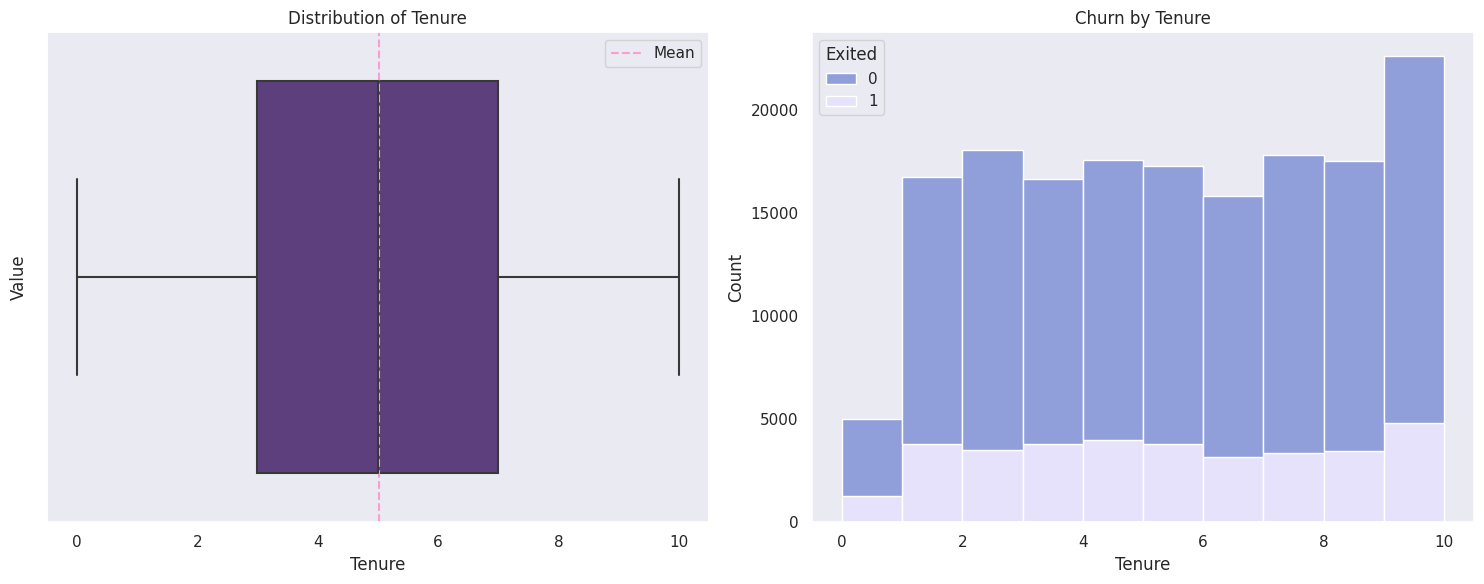

In [16]:
            ### Tenure ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Tenure
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='Tenure', hue='Exited', binwidth=1, multiple='stack', palette=palette1, ax=axes[1])
axes[1].set_title('Churn by Tenure')
axes[1].set_xlabel('Tenure')
axes[1].set_ylabel('Count')

# Box plot for Tenure
palette2 = ["#5D3587"]
sns.boxplot(data=train_df, x='Tenure', palette=palette2, ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Value')

mean_line = train_df['Tenure'].mean()
axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
axes[0].legend()

plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Tenure</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>According to the mean <b>customers have been associated with the bank for around 5 years</b>.</li>
    <br>
    <li>The <b>standard deviation of 2.81</b> indicates a <b>moderate level of variability</b> in tenure durations, with values <b>ranging from a minimum of 0 years to a maximum of 10 years</b>.</li>
    <br>
    <li>The quartile information further highlights that 50% of customers have a tenure of 5 years or less, while the <b>interquartile range spans from 3 to 7 years</b>.</li>
</ul>


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Credit Score</p>

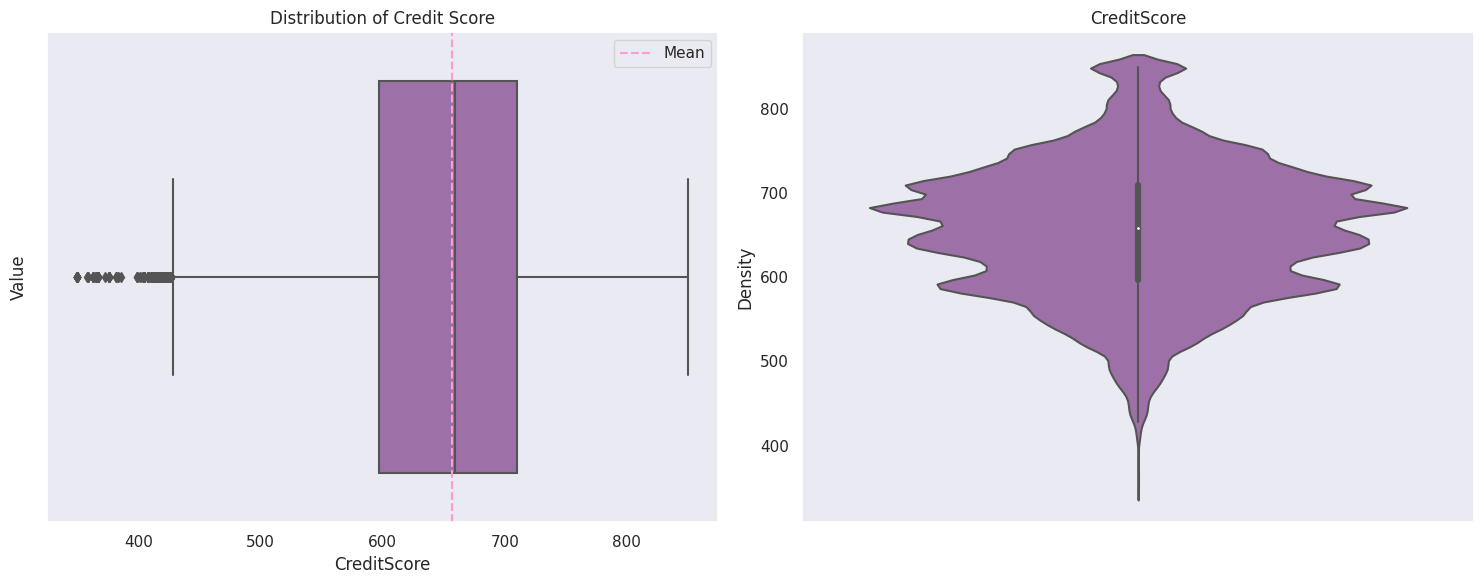

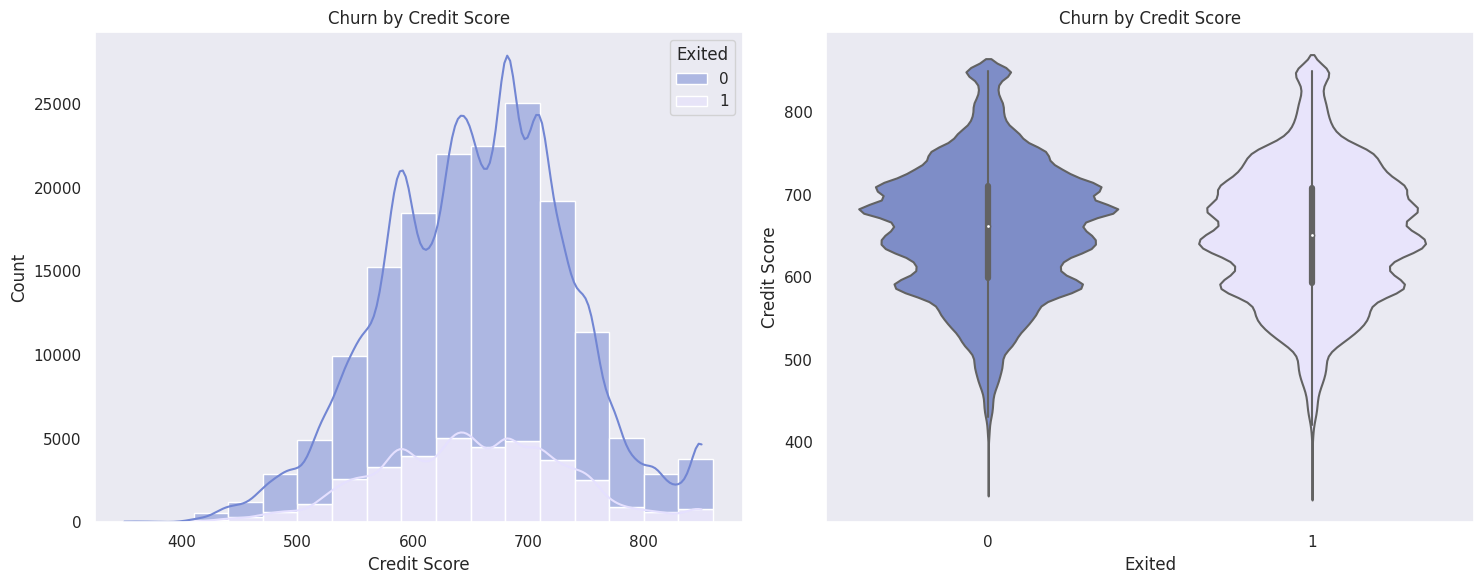

In [17]:
            ### Credit Score ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for Aredit Score
palette = ["#A367B1"]
sns.boxplot(data=train_df,x="CreditScore", palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Credit Score')
axes[0].set_xlabel('CreditScore')
axes[0].set_ylabel('Value')

mean_line = train_df['CreditScore'].mean()
axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
axes[0].legend()

# Violin Plot for Credit Score
sns.violinplot(data=train_df, y='CreditScore', palette=palette, ax=axes[1])
axes[1].set_title('CreditScore')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Credit Score
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='CreditScore', hue='Exited', binwidth=30, kde=True, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_title('Churn by Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Count')

# Violin plot for Credit Score
sns.violinplot(data=train_df, x='Exited', y='CreditScore', palette=palette1, ax=axes[1])
axes[1].set_title('Churn by Credit Score')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Credit Score')


plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Credit Score</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>The <b>average credit score</b> is approximately <b>656.45</b>, reflecting a moderately strong credit profile on average.</li>
    <br>
    <li>The <b>standard deviation of 80.10</b> indicates a <b>reasonable degree of variability</b> in credit scores across the dataset.</li>
    <br>
    <li>The <b>minimum score is 350</b>, while the <b>maximum score</b> reaches the upper limit at <b>850</b>.</li>
    <br>
    <li>The quartile information demonstrates that 50% of customers fall within the credit score range of 597 to 710, emphasizing the <b>central tendency of creditworthiness</b>.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Active Membership</p>

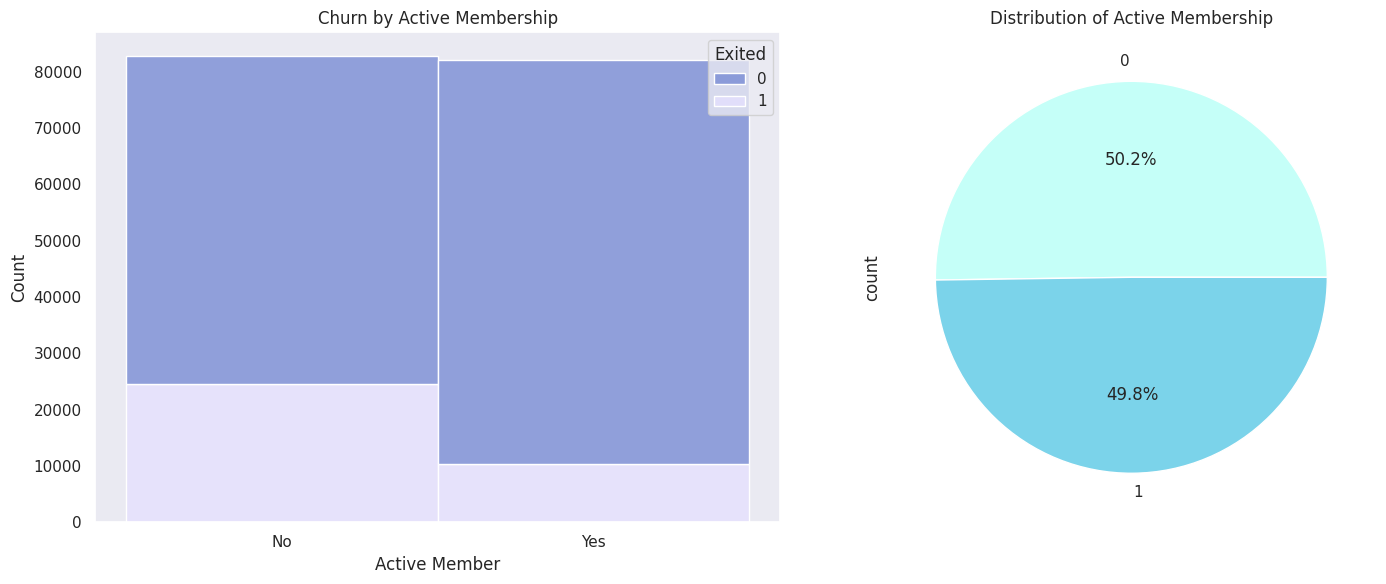

In [18]:
            ### Active Membership ###
    
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Active Membership
palette1 = ["#7286D3", "#E5E0FF"]
train_df['IsActiveMember_2'] = train_df['IsActiveMember'].apply(lambda r: 'Yes' if r == 1 else 'No')
sns.histplot(data=train_df, x='IsActiveMember_2', hue='Exited', binwidth=30, multiple='stack', palette=palette1, ax=ax[0])
ax[0].set_title('Churn by Active Membership')
ax[0].set_xlabel('Active Member')
ax[0].set_ylabel('Count')

# Pie Chart for Active Membership
palette2 = ["#C5FFF8", "#7BD3EA"]
ax[1].set_title('Distribution of Active Membership')
train_df['IsActiveMember_2'].value_counts().plot(kind='pie',labels=train_df['IsActiveMember_2'].index, autopct='%1.1f%%', colors=palette2, ax=ax[1])

plt.tight_layout()
plt.show()


train_df.drop(['IsActiveMember_2'], axis=1, inplace=True)


<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Active Membership</b> Insights</font></h3>

<ul style="color: #365486;">
    <li> In our dataset with a count of 165,034 entries, approximately <b>49.8%</b> of customers are classified as <b>active members</b> and <b>50.2%</b> otherwise.</li>
    <br>
    <li>The <b>standard deviation of 0.50</b> indicates an <b>almost equal distribution between active and inactive members</b>.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Credit Card Ownership</p>

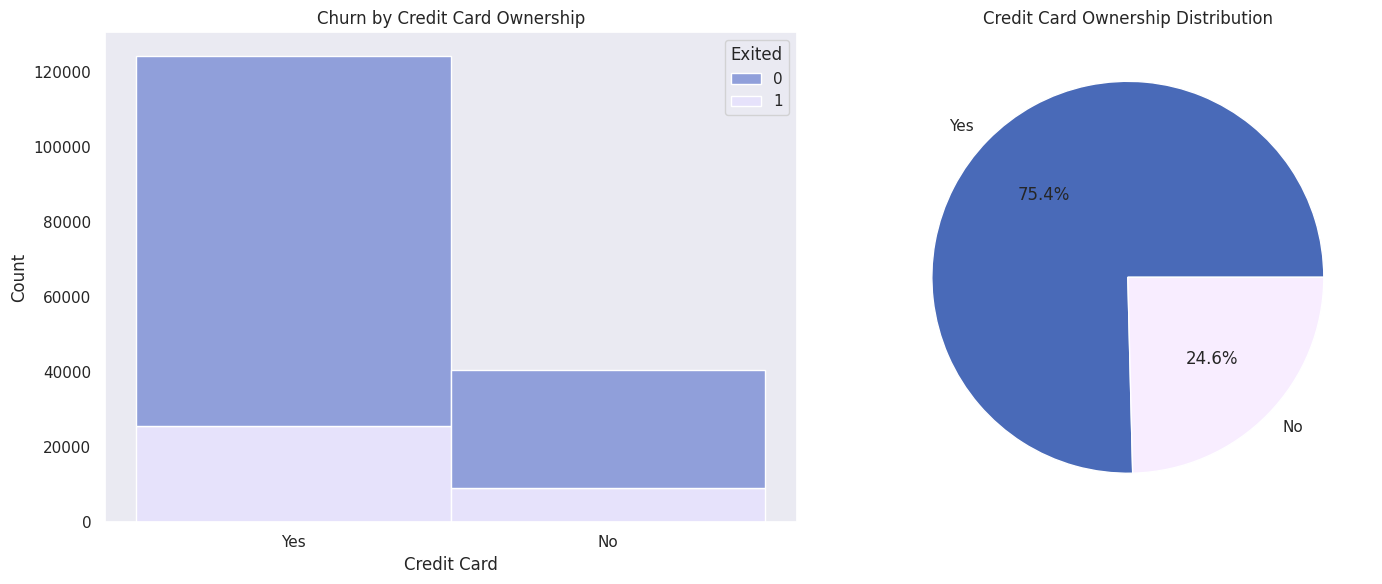

In [19]:
            ### Credit Card Ownership ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


train_df['HasCrCard'] = train_df['HasCrCard'].astype('int')
train_df['HasCrCard_2'] = train_df['HasCrCard'].apply(lambda r: 'Yes' if r == 1 else 'No')

# Histogram for Credit Card Ownership
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='HasCrCard_2', hue='Exited', binwidth=30, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_title('Churn by Credit Card Ownership')
axes[0].set_xlabel('Credit Card')
axes[0].set_ylabel('Count')

# Pie chart for Credit Card Ownership
palette2 =["#496ab8", "#F8EDFF"]
card_counts = train_df['HasCrCard_2'].value_counts()
axes[1].pie(card_counts, labels=card_counts.index, autopct='%1.1f%%', colors=palette2)
axes[1].set_title('Credit Card Ownership Distribution')

plt.tight_layout()
plt.show()

train_df.drop(['HasCrCard_2'], axis=1, inplace=True)


<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Credit Card Ownership</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>The <b>average proportion of customers holding a credit card is approximately 75.4%</b> indicating a substantial <b>majority of individuals with credit cards</b>.</li>
    <br>
    <li>The <b>standard deviation of 0.43</b> suggests a moderate level of variability in credit card ownership among customers.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Number of Products</p>

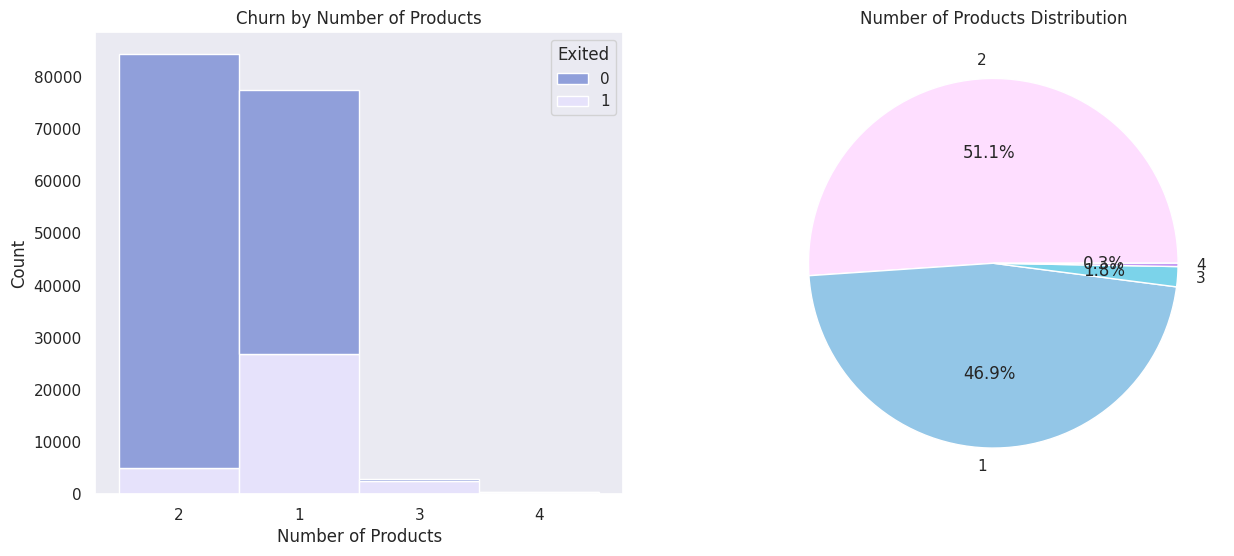

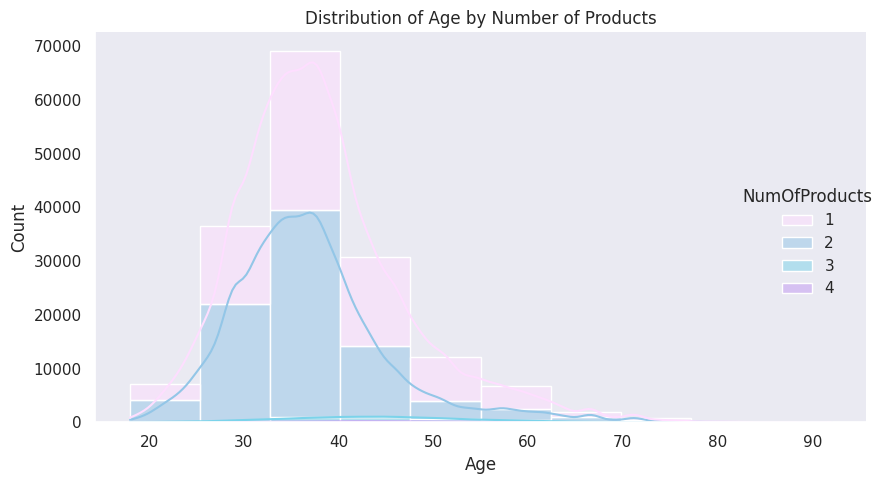

In [20]:
            ### Number of Products ###

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

train_df['NumOfProducts_2'] = train_df['NumOfProducts'].apply(lambda r: '1' if r == 1 else ('2' if r == 2 else ('3' if r == 3 else '4')))

# Histogram for Number of Products
palette1 =["#7286D3","#E5E0FF"]
sns.histplot(data=train_df, x='NumOfProducts_2', hue='Exited', multiple='stack', palette=palette1, ax=ax[0])
ax[0].set_title('Churn by Number of Products')
ax[0].set_xlabel('Number of Products')
ax[0].set_ylabel('Count')

# Pie chart for Number of Products
palette2 =["#FEDEFF", "#93C6E7", "#7BD3EA", "#C499F3"]
counts = train_df['NumOfProducts_2'].value_counts()
ax[1].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=palette2)
ax[1].set_title('Number of Products Distribution')

g = sns.displot(data=train_df, x='Age', hue='NumOfProducts', bins=10, kde=True, palette=palette2, multiple='stack', aspect=1.5)
g.set(title='Distribution of Age by Number of Products', xlabel='Age', ylabel='Count')

plt.tight_layout()
plt.show()

train_df.drop(['NumOfProducts_2'], axis=1, inplace=True)

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Number of Products</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>Customers typically hold between <b>1 and 4 products</b>.</li>
    <br>
    <li>The <b>average number of products per customer is approximately 1.55</b>, with a <b>standard deviation of 0.55</b>, indicating a <b>moderate level of variability</b>.</li>
    <br>
    <li>The quartile information highlights that <b>98% of customers have 2 or fewer products</b>.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Balance</p>

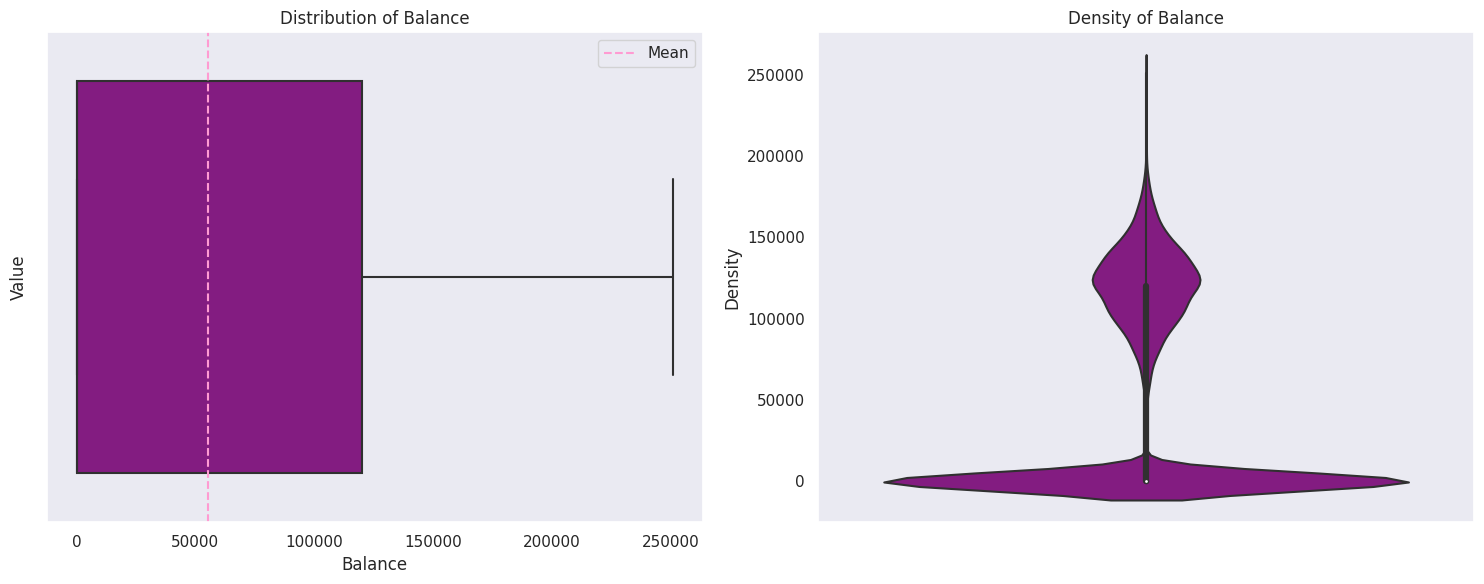

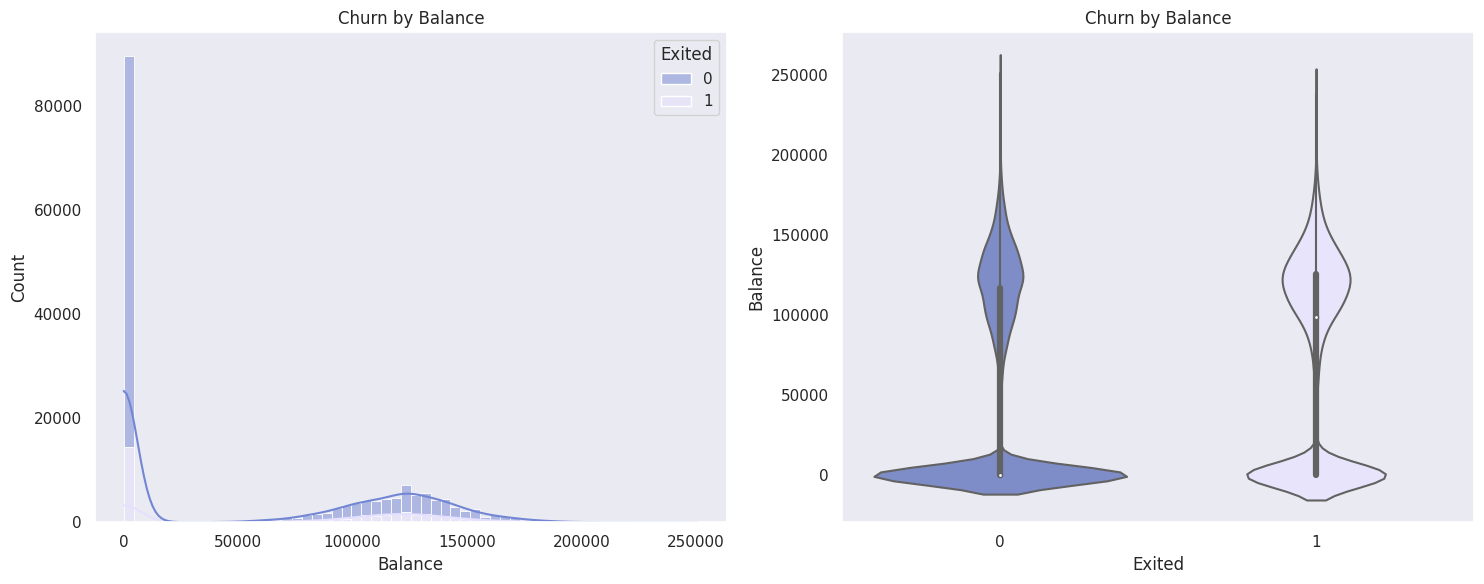

In [21]:
            ### Balance ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for Balance
palette = ["#940B92"]
sns.boxplot(data=train_df,x="Balance", palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Balance')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Value')

mean_line = train_df['Balance'].mean()
axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
axes[0].legend()

# Violin Plot for Balance
sns.violinplot(data=train_df, y='Balance', palette=palette, ax=axes[1])
axes[1].set_title('Density of Balance')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Balance
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='Balance', hue='Exited',kde=True, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_title('Churn by Balance')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Count')

# Violin plot for Balance
sns.violinplot(data=train_df, x='Exited', y='Balance', palette=palette1, ax=axes[1])
axes[1].set_title('Churn by Balance')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Balance')


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Balance</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>The <b>average balance is approximately 55,478.09</b>, accompanied by a relatively high <b>standard deviation of 62,817.66</b>, indicating a <b>significant spread in account balances</b>.</li>
    <br>
    <li>The <b>minimum balance is 0</b>, while the <b>maximum balance reaches 250,898.09</b>.</li>
    <br>
    <li>Quartile information highlights that <b>75% of customers have a balance less than 119,939.52</b>, emphasizing the <b>skewed distribution of account balances towards lower values</b>.</li>
</ul>

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:white;font-family:newtimeroman;color:#5D3587;font-size:160%;text-align:center;border-radius:10px 10px;">Estimated Salary</p>

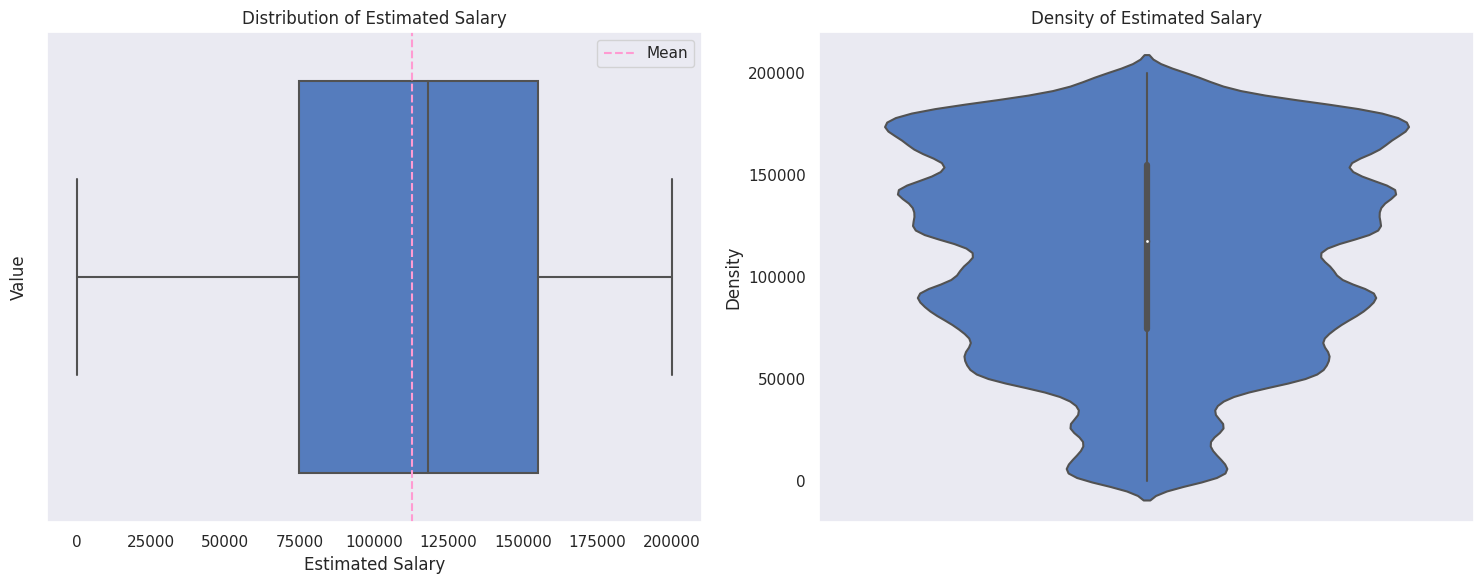

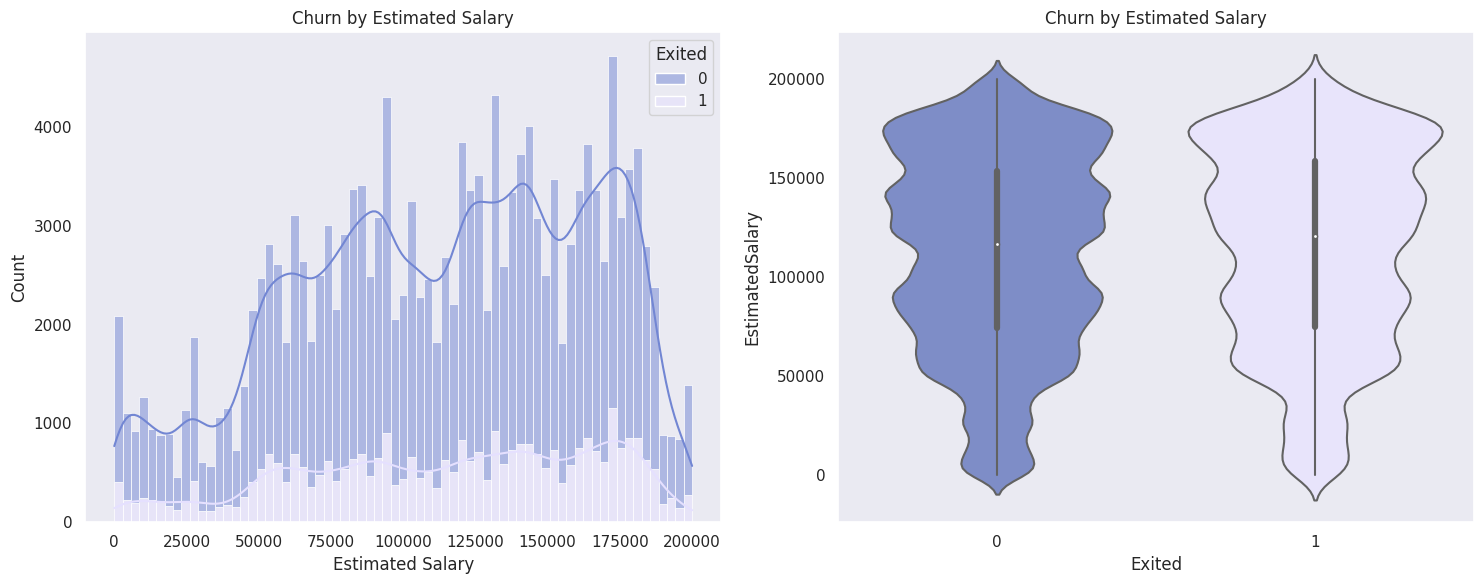

In [22]:
            ### Estimated Salary ###
    
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for Estimated Salary
palette = ["#4477CE"]
sns.boxplot(data=train_df,x="EstimatedSalary", palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Estimated Salary')
axes[0].set_xlabel('Estimated Salary')
axes[0].set_ylabel('Value')

mean_line = train_df['EstimatedSalary'].mean()
axes[0].axvline(mean_line, color='#FF9BD2', linestyle='--', label='Mean')
axes[0].legend()

# Violin Plot for Estimated Salary
sns.violinplot(data=train_df, y='EstimatedSalary', palette=palette, ax=axes[1])
axes[1].set_title('Density of Estimated Salary')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Estimated Salary
palette1 = ["#7286D3", "#E5E0FF"]
sns.histplot(data=train_df, x='EstimatedSalary', hue='Exited',kde=True, multiple='stack', palette=palette1, ax=axes[0])
axes[0].set_title('Churn by Estimated Salary')
axes[0].set_xlabel('Estimated Salary')
axes[0].set_ylabel('Count')

# Violin plot for Estimated Salary
sns.violinplot(data=train_df, x='Exited', y='EstimatedSalary', palette=palette1, ax=axes[1])
axes[1].set_title('Churn by Estimated Salary')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('EstimatedSalary')


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#8EACCD solid; padding: 15px; background-color: #D2E0FB; font-size:100%; text-align:left">
    <h3 align="left"><font color='#A367B1'>💡 <b>Estimated Salary</b> Insights</font></h3>

<ul style="color: #365486;">
    <li>The <b>average estimated salary is approximately 112,574.82</b>, accompanied by a <b>standard deviation of 50,292.87</b>, suggesting a <b>moderate variability</b> in estimated salaries.</li>
    <br>
    <li>The <b>minimum salary is 11.58</b>, indicating a <b>diverse range of income levels</b>, while the <b>maximum salary reaches 199,992.48</b>.</li>
    <br>
    <li>Quartile information highlights that <b>50% of customers have an estimated salary between 74,637.57 and 155,152.47</b>.</li>
</ul>

<a id="7"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Feature Engineering</p>

In [23]:
def add_features(df):
    df['SeniorCitizen'] = df['Age'].apply(lambda x : 1 if x >= 65 else 0)
    df['ActiveCreditUser'] = df['HasCrCard'] * df['IsActiveMember']
    df['CreditScoreRating'] = df['CreditScore'].apply(lambda x: 1 if x >= 650 else 0)
    df['TenureRating'] = df['Tenure'].apply(lambda x: 'New' if x <=2 else 'Old')
    df['SavingsPerAge'] = df['Balance'] / df['Age']
    return df

train_df = add_features(train_df)
test_df = add_features(test_df)
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SeniorCitizen,ActiveCreditUser,CreditScoreRating,TenureRating,SavingsPerAge
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0,0,0,1,Old,0.000000
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0,0,1,0,New,0.000000
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0,0,0,1,Old,0.000000
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0,0,1,0,New,4378.898235
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0,0,1,1,Old,0.000000


<a id="8"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

In [24]:
def encoder(df):
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
    df['Geography'] = label_encoder.fit_transform(df['Geography'])
    df['TenureRating'] = label_encoder.fit_transform(df['TenureRating'])
    return df

train_df = encoder(train_df)
test_df = encoder(test_df)

In [25]:
# Separating features and target variable in the training data
X = train_df.drop(['Exited'], axis = 1)
y = train_df['Exited']

# Split the dataset into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

# X_train.hist(figsize=(15,12),color = '#8EA7E9')
# plt.show()

((132027, 15), (132027,), (33007, 15), (33007,))

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

test_df = scaler.fit_transform(test_df)

<a id="9"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Light GBM Model</p>

In [27]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

In [28]:
lgbParams = {'objective': 'binary',
 'metric': 'auc',
 'max_depth': 10,
 'learning_rate': 0.01,
 'is_unbalance': 'true',
 'boosting': 'gbdt',
 'num_leaves': 63,
 'min_child_samples': 15,
 'subsample': 0.2,
 'min_child_samples': 15,
 'colsample_bytree': 0.3,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.5,
 'bagging_freq': 2,
 'verbose': -1}

In [29]:
model_lgbm = lgb.train(lgbParams, train_data, valid_sets=valid_data, num_boost_round=5000, early_stopping_rounds=50)

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.2 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.3 will be ignored. Current value: feature_fraction=0.5
[1]	valid_0's auc: 0.801675
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.810069
[3]	valid_0's auc: 0.815382
[4]	valid_0's auc: 0.817261
[5]	valid_0's auc: 0.817913
[6]	valid_0's auc: 0.819138
[7]	valid_0's auc: 0.844159
[8]	valid_0's auc: 0.855707
[9]	valid_0's auc: 0.862408
[10]	valid_0's auc: 0.860827
[11]	valid_0's auc: 0.8585
[12]	valid_0's auc: 0.866613
[13]	valid_0's auc: 0.865082
[14]	valid_0's auc: 0.870395
[15]	valid_0's auc: 0.875578
[16]	valid_0's auc: 0.873916
[17]	valid_0's auc: 0.872444
[18]	valid_0's auc: 0.87505
[19]	valid_0's auc: 0.876975
[20]	valid_0's auc: 0.87576
[21]	valid_0's auc: 0.877704
[22]	valid_0's auc: 0.879571
[23]	valid_0's auc: 0.880281
[24]	valid_0's auc: 0.88174
[25]	valid_0's a

In [30]:
# Make Predictions
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

# Evaluate Predictions
print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                   roc_auc_score(y_valid,y_valid_pred)))

AUC Train: 0.9044
AUC Valid: 0.8910


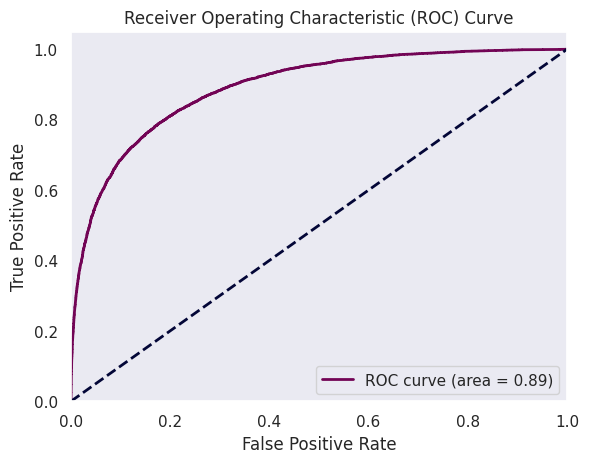

In [31]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='#720455', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='#030637', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_valid, y_valid_pred)

<a id="10"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#82A0D8;font-family:newtimeroman;color:white;font-size:160%;text-align:center;border-radius:10px 10px;">Submission</p>

In [32]:
sample_submission_df['Exited'] = model_lgbm.predict(test_df)
sample_submission_df.head()

,id,Exited
0,165034,0.097425
1,165035,0.935823
2,165036,0.090561
3,165037,0.546917
4,165038,0.664303


In [33]:
sample_submission_df.to_csv('submission.csv', index=False)

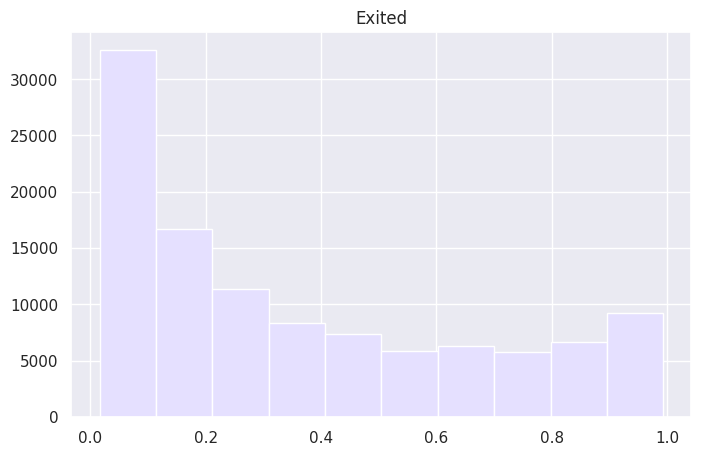

In [34]:
sample_submission_df.hist(column='Exited', bins=10, figsize=(8,5), color = '#E5E0FF')
plt.show()

<p style="font-size: 16px; color: #4CAF50; text-align: center;">
    If you find this notebook useful, support with an upvote 👍
</p>